<h1 style="font-size: 40px; margin-bottom: 0px;">Week 3 Assignment</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h1 style="color:#FF0000;"><strong><u>KEY</u></strong></h1>

<strong><u>Due: Saturday, September 20 at 11:59PM</u></strong>

<strong><u>Total points: 5 pts</u></strong>

<strong><u>To turn in your assignment:</u></strong>
<ol>
    <li>Complete assignment and make sure you have all the outputs requested for the notebook</li>
    <li>Go to your server's file directory and locate the <code>week_3_homework</code> directory containing all your outputs from this assignment including this notebook</li>
    <li>Right click and select <strong>Download as an Archive</strong> to download the <code>week_3_homework</code> directory as a ZIP folder. Do not mix up with <strong>Download Current Folder as an Archive</strong></li>
    <li>Upload your ZIP folder to your individual feedback Google Drive folder under <code>MCB201B</code></li>
</ol>

<strong><u>How this assignment will be graded:</u></strong>

You will be graded on whether or not you have <u>all requested outputs and files</u> and if your output is correct. You will also be graded on if your code is expected to be able to run without errors. There can be more than one correct way to answer a question. If you find that you prefer to separate your answer for a single question into multiple code cells, feel free to do so.
<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

<h2>Question 1</h2>

1pt

Import the <code>jack_fries_stats.csv</code> file located in the <code>week_3_homework</code> directory. Identify an appropriate function to determine the counts breakdown for each rating that appears. Use this function to find the counts for how Jack rated McDonald's fries and how he rated Nation's fries.  

Run an appropriate statistical test to compare whether there is a significant difference in how Jack rated McDonald's fries versus Nation's fries. Output the p-value.

In [2]:
data = pd.read_csv('jack_fries_stats.csv')

In [3]:
mcrating = data['McDonald_rating'].value_counts()

print(mcrating)

McDonald_rating
1.0    7
4.0    6
5.0    6
3.0    5
2.0    5
Name: count, dtype: int64


In [4]:
natrating = data['Nations_rating'].value_counts()

print(natrating)

Nations_rating
3.0    10
4.0     7
5.0     7
Name: count, dtype: int64


In [5]:
rating_results = stats.mannwhitneyu(data['McDonald_rating'], 
                                    data['Nations_rating'],
                                    nan_policy='omit'
                                   )
rating_results.pvalue

np.float64(0.02939421910292284)

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 2</h2>

1pt

Calculate the mean and standard error of the mean for how many fries Jack receives when he orders from McDonalds and when he orders from Nation's. Run an appropriate statistical test to compare whether there is a significant difference in the average number of fries that Jack gets from McDonalds and Nation's.

In [6]:
means = data[['McDonalds_fries_count', 'Nations_fries_count']].mean()
print(means)

McDonalds_fries_count    30.054545
Nations_fries_count      33.981132
dtype: float64


In [7]:
sem = data[['McDonalds_fries_count', 'Nations_fries_count']].sem()
print(sem)

McDonalds_fries_count    0.484381
Nations_fries_count      0.389904
dtype: float64


In [8]:
counts_results = stats.ttest_ind(data['McDonalds_fries_count'],
                                 data['Nations_fries_count'],
                                 nan_policy='omit'
                                )
counts_results.pvalue

np.float64(7.334157820043454e-09)

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 3</h2>

1pt

For this question, you will need to use Python to create a new summary log plain text file containing the following information and properly annotated:

<ul>
    <li>The number of times Jack rated McDonald's french fries 5 out of 5</li>
    <li>The number of times Jack rated Nation's french fries 5 out of 5</li>
    <li>Whether or not there was a significant difference in rating and what the p-value is</li>
    <li>The mean &plusmn; sem for McDonald's french fry counts</li>
    <li>The mean &plusmn; sem for Nation's french fry counts</li>
    <li>Whether there is a significant difference in number of french fry counts</li>
</ul>

You will need to make sure that your homework submission has this summary text file as well.

In [9]:
with open('summary_log.txt', 'w') as fries:
    fries.write(f"McDonalds number of times rated 5 out of 5: {mcrating[5.0]} times\n\
Nation's number of times rated 5 out of 5: {natrating[5.0]} times\n")
    if rating_results.pvalue < 0.05:
        fries.write(f"There is a significant difference in rating with p-value={rating_results.pvalue:.4f}\n")
    else:
        fries.write(f"There is no significant difference in rating with p-value={rating_results.pvalue:.4f}\n")

    fries.write(f"Number of McDonalds fries given were {means['McDonalds_fries_count']:.2f}\u00B1{sem['McDonalds_fries_count']:.2f} (mean\u00B1sem)\n\
Number of Nation's fries given were {means['Nations_fries_count']:.2f}\u00B1{sem['Nations_fries_count']:.2f} (mean\u00B1sem)\n")
    if counts_results.pvalue < 0.05:
        fries.write(f"There is a significant difference in counts with p-value={counts_results.pvalue:.4f}\n")
    else:
        fries.write(f"There is no significant difference in counts with p-value={counts_results.pvalue:.4f}\n")

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 4</h2>

1pt

Your answer to this question must be able to run <u>in a single code cell</u> that includes the pre-defined array. 

Initialize two arrays of zeros of appropriate size to hold outputs from a for-loop. Then set up a for-loop that will do the following:

<ol>
    <li>Pull in each value of of the pre-defined array </li>
    <li>Add a randomly generated integer ranging from 0-100 to that value - the random integer should be set up to change with each iteration of the for-loop</li>
    <ul>
        <li>You can use the function <code>np.random.randint()</code> as your random integer generator. <a href="https://numpy.org/doc/2.0/reference/random/generated/numpy.random.randint.html" rel="noopener noreferrer"><u>Documentation is here.</u></a></li>
    </ul>
    <li>Store the randomly generated integer used in the calculation to one of the arrays of zeros</li>
    <li>Store the calculation results in your other array of zeros</li>
</ol>

Print out your two arrays that now have the outputs of your for-loop.

In [10]:
predefined_array = np.arange(0, np.random.randint(25, 100), 1)

x = np.zeros(len(predefined_array))
y = np.zeros(len(predefined_array))

for i in np.arange(0, len(predefined_array), 1):
    x[i] = np.random.randint(0, 100)
    y[i] = predefined_array[i] + x[i]

print(x, y)

[87. 29. 69. 43. 91. 77. 85.  7. 90. 79. 26. 65. 37. 95.  8. 50. 69. 52.
 19. 77. 68. 80.  0. 21. 21. 38. 91. 27. 42.  1. 21. 30. 30. 63. 47. 43.
 63. 63. 22. 73. 97. 13. 77. 57. 51. 93.  6. 27. 13. 99. 99. 88. 42.  5.
 75. 13. 33. 97. 58. 42. 87. 32. 81. 52. 53. 49. 78. 29. 63.  3. 96. 84.
 61. 23. 99. 18. 89. 75. 58.] [ 87.  30.  71.  46.  95.  82.  91.  14.  98.  88.  36.  76.  49. 108.
  22.  65.  85.  69.  37.  96.  88. 101.  22.  44.  45.  63. 117.  54.
  70.  30.  51.  61.  62.  96.  81.  78.  99. 100.  60. 112. 137.  54.
 119. 100.  95. 138.  52.  74.  61. 148. 149. 139.  94.  58. 129.  68.
  89. 154. 116. 101. 147.  93. 143. 115. 117. 114. 144.  96. 131.  72.
 166. 155. 133.  96. 173.  93. 165. 152. 136.]


<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 5</h2>

1pt

Run a linear regression analysis on your two arrays from question 4, and calculate the R&sup2; value. 

Plot a scatterplot with the linear regression model, and export your plot as a PDF to be included in your homework submission. You don't need to label axes.

In [11]:
reg_calc = stats.linregress(x, 
                            y,
                            nan_policy='omit'
                           )

print(reg_calc.rvalue**2)

0.6453879733816864


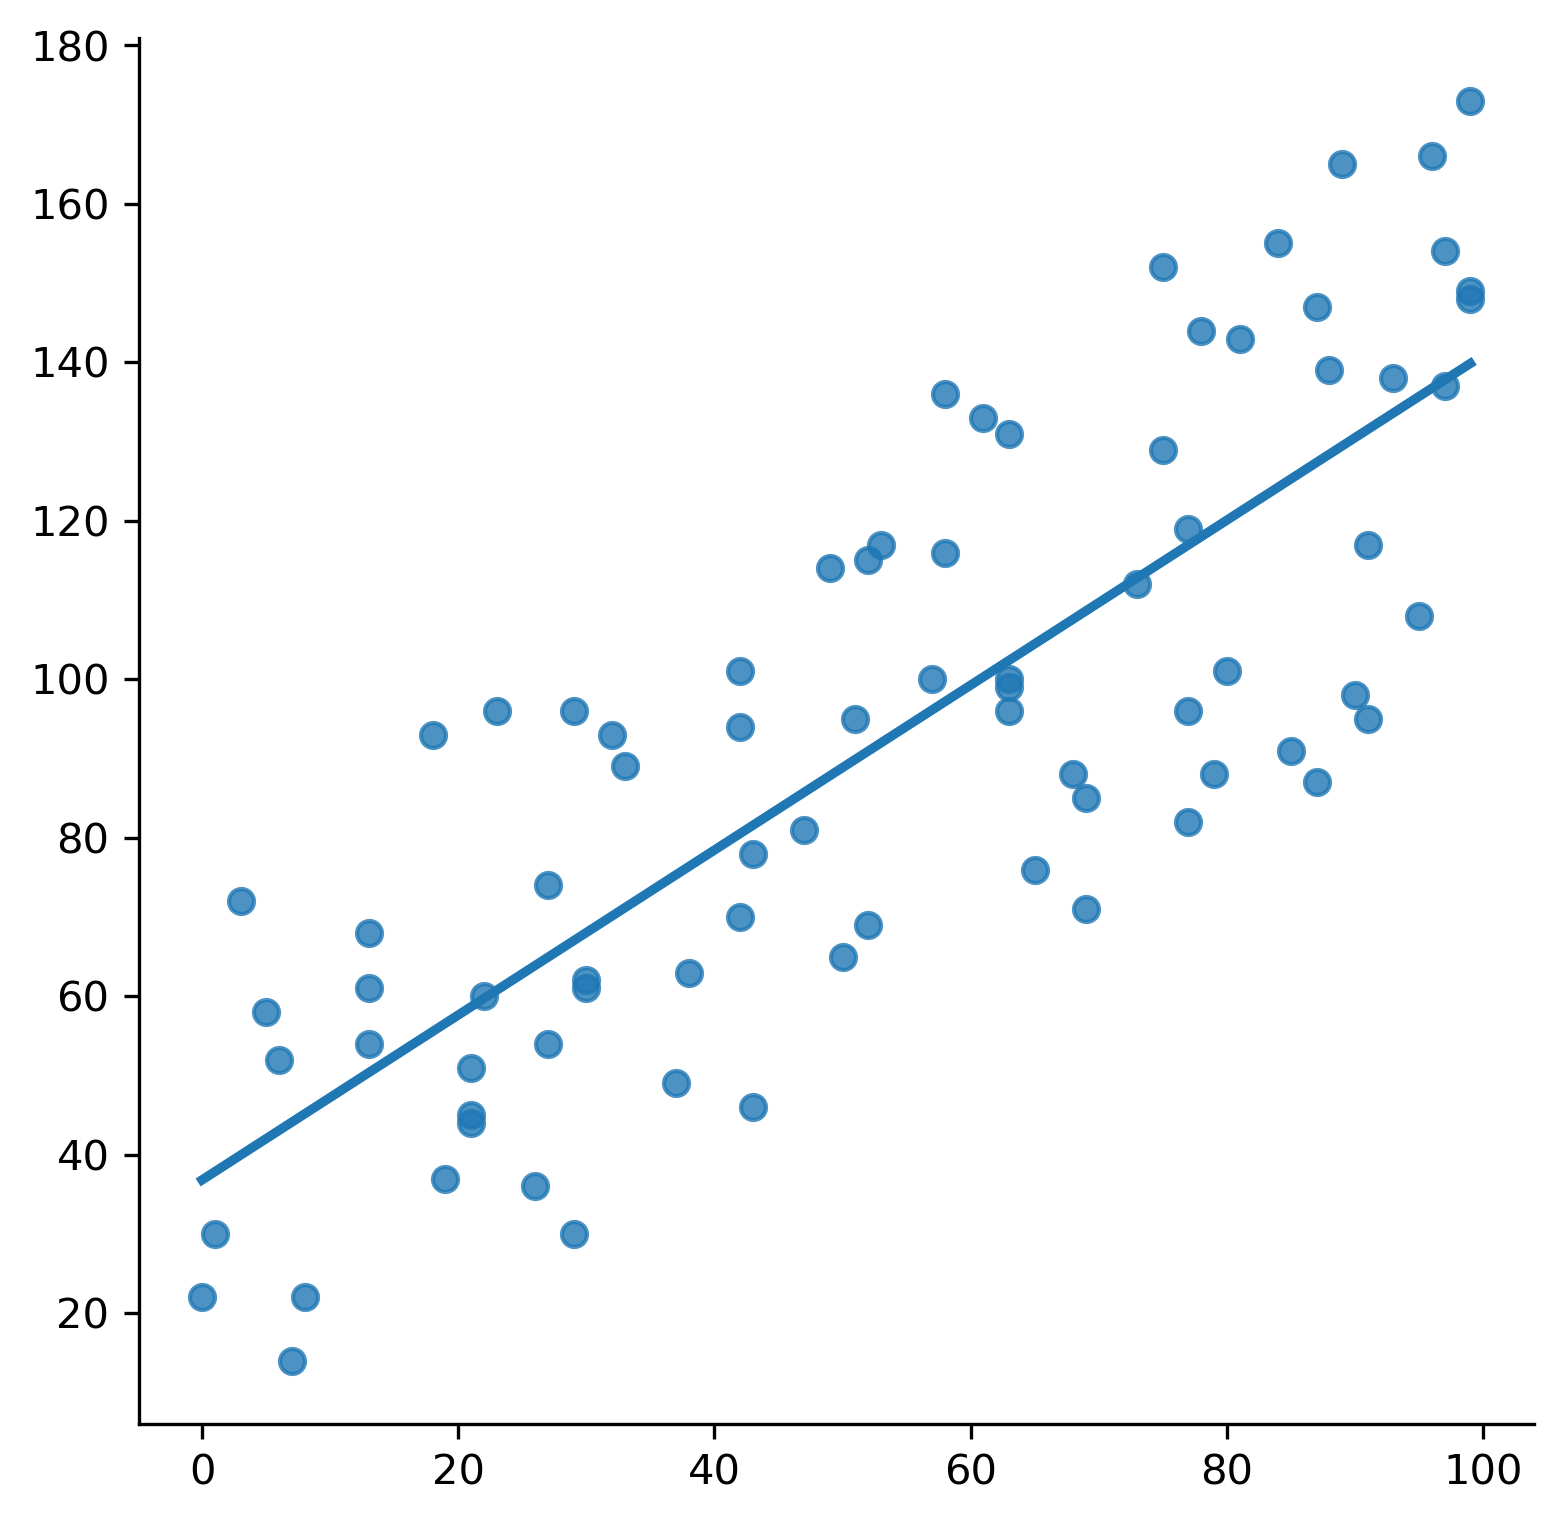

In [12]:
fig, ax = plt.subplots()

sns.regplot(x=x,
            y=y,
            ci=None
           )

fig.set_size_inches(6,6)
fig.set_dpi(300)
sns.despine()
plt.show()
fig.savefig('question_5.pdf', bbox_inches='tight')

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>